In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import torch
import sys
sys.path.insert(0, '../src')

ResidualFramePredictor_v1 reached a loss of 0.053100817229436804 at epoch 30
ResidualFramePredictor_v2 reached a loss of 0.0730066017612167 at epoch 110
ResidualFramePredictor_v3 reached a loss of 0.04030158540800862 at epoch 276
ResidualFramePredictor_v4 reached a loss of 0.0485782046680865 at epoch 76
ResidualFramePredictor_v5 reached a loss of 0.051995006430408226 at epoch 87
ResidualFramePredictor_v6 reached a loss of 0.06985082088605216 at epoch 40
ResidualFramePredictor_v7 reached a loss of 0.07038421054249225 at epoch 37
ResidualFramePredictor_v8 reached a loss of 0.06265137101645055 at epoch 45
--------------------------------
ConvNextFramePredictor_v1 reached a loss of 0.04652684700229894 at epoch 223
ConvNextFramePredictor_v2 reached a loss of 0.043397356569767 at epoch 178
ConvNextFramePredictor_v3 reached a loss of 0.04506332589232403 at epoch 214


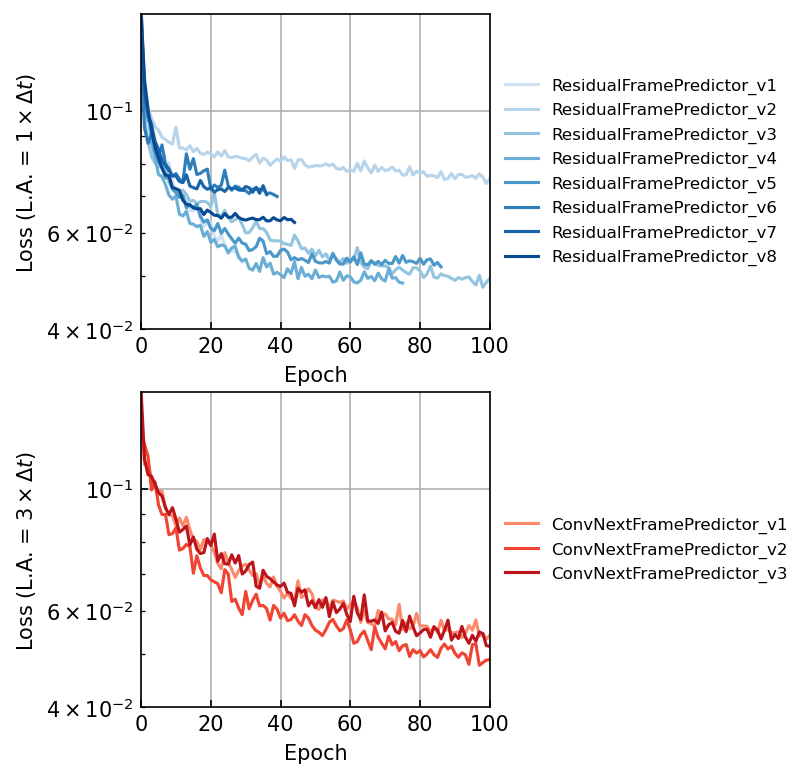

In [2]:
import glob
import os
from res_ae import ResidualFramePredictor
from res_ae_convnext import ConvNextFramePredictor

fig, ax = plt.subplots(2, 1, sharex=False, sharey=False, dpi=150, figsize=(3, 6))

model_paths = sorted(glob.glob('../models/ResidualFramePredictor_v*'))
cmap = plt.cm.Blues
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax[0].plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]} at epoch {len(info["losses"])}')


ax[0].set_ylabel(r'Loss (L.A. = $1\times\Delta t$)')
print('--------------------------------')

model_paths = sorted(glob.glob('../models/ConvNextFramePredictor_v*'))
cmap = plt.cm.Reds
for i, model_path in enumerate(model_paths):
    info = torch.load(f'{model_path}/model_weight.ckpt', map_location='cpu', weights_only=True)
    color = cmap((i + 2) / (len(model_paths) + 2))
    ax[1].plot(info['losses'], label=os.path.basename(model_path), color=color)
    print(f'{os.path.basename(model_path)} reached a loss of {info["losses"][-1]} at epoch {len(info["losses"])}')

ax[1].set_ylabel(r'Loss (L.A. = $3\times\Delta t$)')

for a in ax:
    a.legend(fontsize=8, loc='center left', bbox_to_anchor=[1, 0.5], framealpha=0)
    a.set(
        xlabel='Epoch',
        yscale='log',
        ylim=[0.04, 0.15],
        xlim=[0, 100]
    )
    a.grid(True)
    a.tick_params(which='both', direction='in')

